In [25]:
import warnings
import os
os.chdir(f'/mnt/primary/exposure-fairness-extend/')
# os.chdir(f'/home/xuejunchang/OneDrive/PhD/projects/exposure-fairness-extend')
# os.chdir(os.path.abspath('config.py'))
import config
warnings.filterwarnings('ignore')
import pyterrier as pt
if not pt.started():
    pt.init()

import gini
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 100)
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [26]:
import importlib
importlib.reload(config)

msmarco-passage/dev documents: 100%|██████████| 8841823/8841823 [01:02<00:00, 141449.53it/s]


<module 'config' from '/mnt/primary/exposure-fairness-extend/config.py'>

In [24]:
km = 'scikit_dense'
modelname = "bm25"
result_csv_path = f'{config.data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_models_granularities_{km}.csv'
bm25 = pd.read_csv(result_csv_path, index_col=0).reset_index()

# modelname = "splade"
# result_csv_path = f'{config.data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_models_granularities_{km}.csv'
# splade = pd.read_csv(result_csv_path, index_col=0).reset_index()

# modelname = "tctcolbert"
# result_csv_path = f'{config.data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_models_granularities_{km}.csv'
# tctcolbert = pd.read_csv(result_csv_path, index_col=0).reset_index()

# modelname = "bm25_tctcolbert"
# result_csv_path = f'{config.data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_models_granularities_{km}.csv'
# bm25_tctcolbert = pd.read_csv(result_csv_path, index_col=0).reset_index()

# modelname = "bm25_monot5"
# result_csv_path = f'{config.data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_models_granularities_{km}.csv'
# bm25_monot5 = pd.read_csv(result_csv_path, index_col=0).reset_index()

AttributeError: module 'config' has no attribute 'retrieve_num'

In [15]:
bm25.head()

NameError: name 'bm25' is not defined

In [6]:
result_df = pd.read_csv('/mnt/datasets/cxj/exposure-fairness/v2/tctcolbert_msmarco-passage_dev_100_1000_scikit_tfidf.csv',index_col=0).reset_index()

In [10]:
sorted_result_df = result_df.sort_values(by="cluster")

In [12]:
sorted_result_df.tail()

,qid,docid,docno,score,rank,r_score,query,cluster
1416999,1081946,304500,304500,78.260720,99,0.216679,what exercise work out the triceps,999
1416984,1081946,1513608,1513608,78.287860,84,0.224500,what exercise work out the triceps,999
1416993,1081946,7147701,7147701,78.273470,93,0.219593,what exercise work out the triceps,999
1416994,1081946,7435754,7435754,78.267166,94,0.219089,what exercise work out the triceps,999
4804501,371158,1483192,1483192,78.384790,1,0.910239,how to naturally gain muscle without exercise,999


In [ ]:
run_model = ['bm25', 'splade', 'tctcolbert', 'bm25_tctcolbert', 'bm25_monot5']
num_clusters = config.num_clusters
data_dir = '/mnt/datasets/cxj/exposure-fairness/v2'
kms = ['scikit_dense','scikit_tfidf']

for km in kms:
    for modelname in run_model:
        for granu in num_clusters:
            print(f'calc_topical_gini at granularity {granu} --> {modelname}')
            topical_res_path = f'{data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_{granu}_{km}.csv'
            res_df = pd.read_csv(topical_res_path, index_col=0).reset_index()
            grouped_df = res_df.groupby('cluster')
    
            res = []
            for group_id, df in grouped_df:
                sum_rscores = df.groupby("docno")[['r_score']].sum().reset_index()
                print('calc group_gini')
                group_gini = gini.compute_gini(sum_rscores['r_score'].to_dict())
                print(f'group_gini: {group_gini}')
                res.append([modelname, granu, group_id, group_gini])
    
            df_granularity_wise = pd.DataFrame(res, columns=['modelname', 'granu', 'group_id', 'group_gini'])
            csv = f'{data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_{granu}_{km}_each_group_gini.csv'
            df_granularity_wise.to_csv(csv,index=False)

In [10]:
data_dir = '/mnt/datasets/cxj/exposure-fairness/v2'
modelname = 'splade'
granu = 500
km = 'scikit_dense'
# csv = f'{data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_100_{granu}_{km}_each_group_gini.csv'
csv = f'{config.prog_dir}/grouped_queries/clustered_dev_queries_by_10000_scikit_dense.csv'
res_df = pd.read_csv(csv, index_col=0).reset_index()


In [12]:
res_df[res_df['cluster'] == 1921]

,qid,query,cluster
52388,647932,what does sim lock di,1921
79613,210912,how can one ban an entire computer from an sl sim,1921
83714,220255,how do sims get married but not private,1921


In [64]:
df_500.head()

,modelname,granu,group_id,group_gini
0,bm25,500,0,0.290967
1,bm25,500,1,0.233496
2,bm25,500,2,0.285716
3,bm25,500,3,0.307639
4,bm25,500,4,0.289040


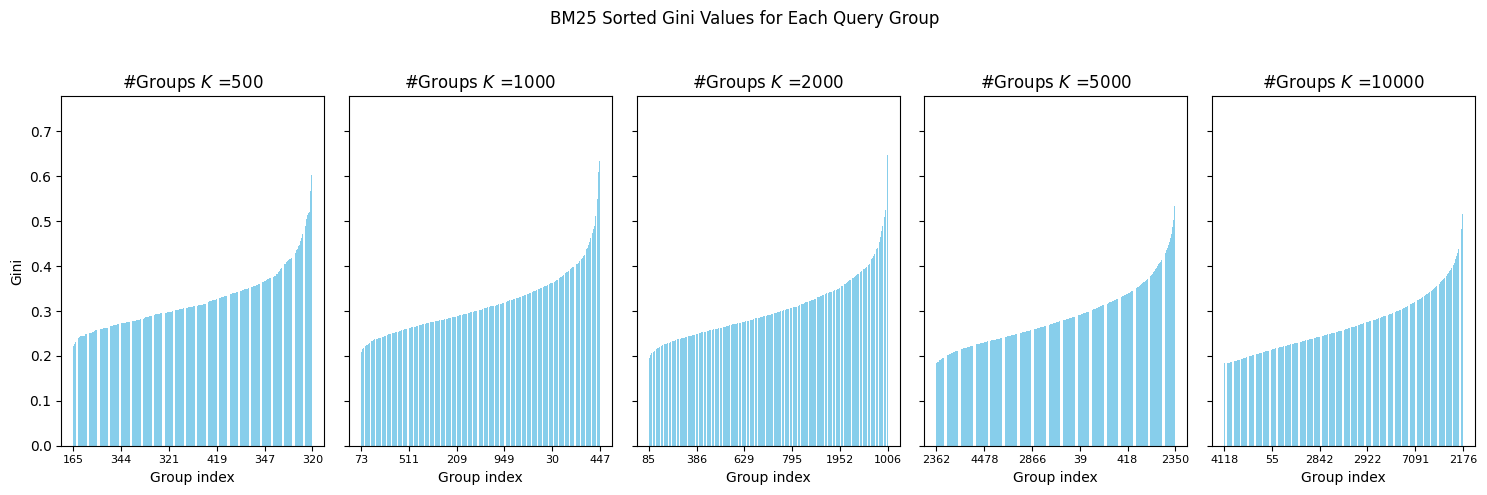

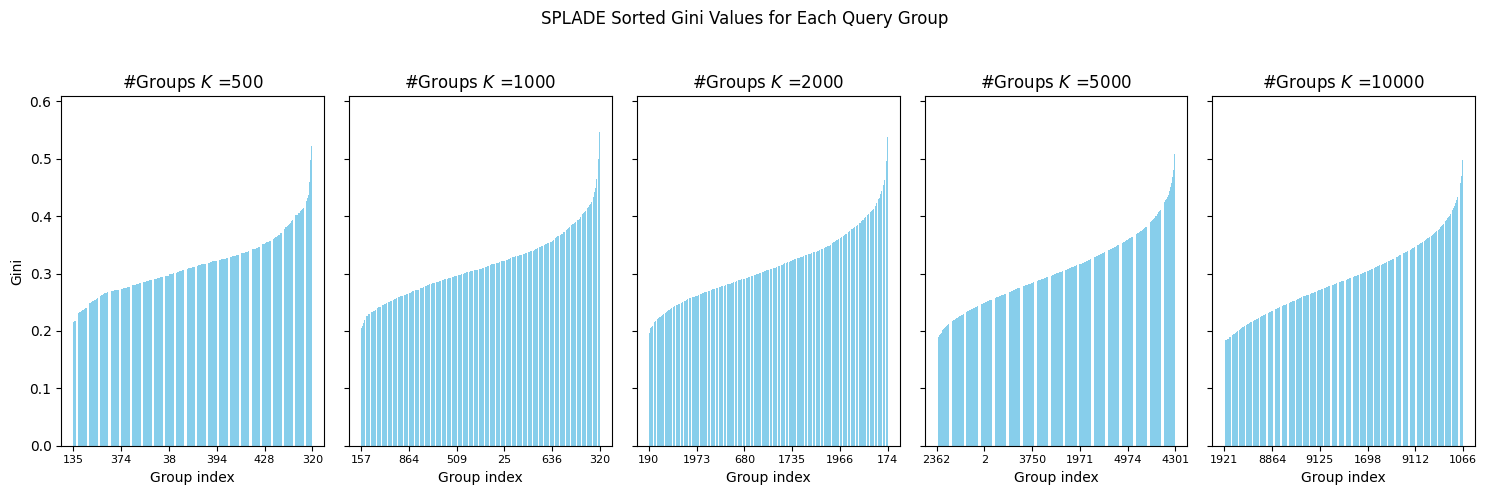

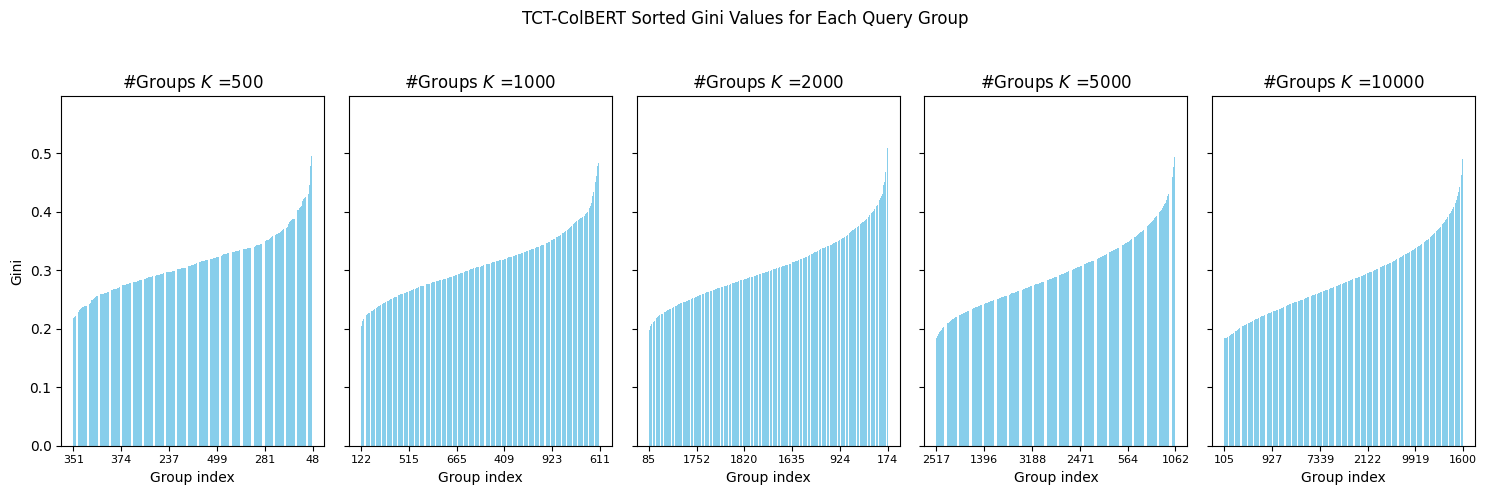

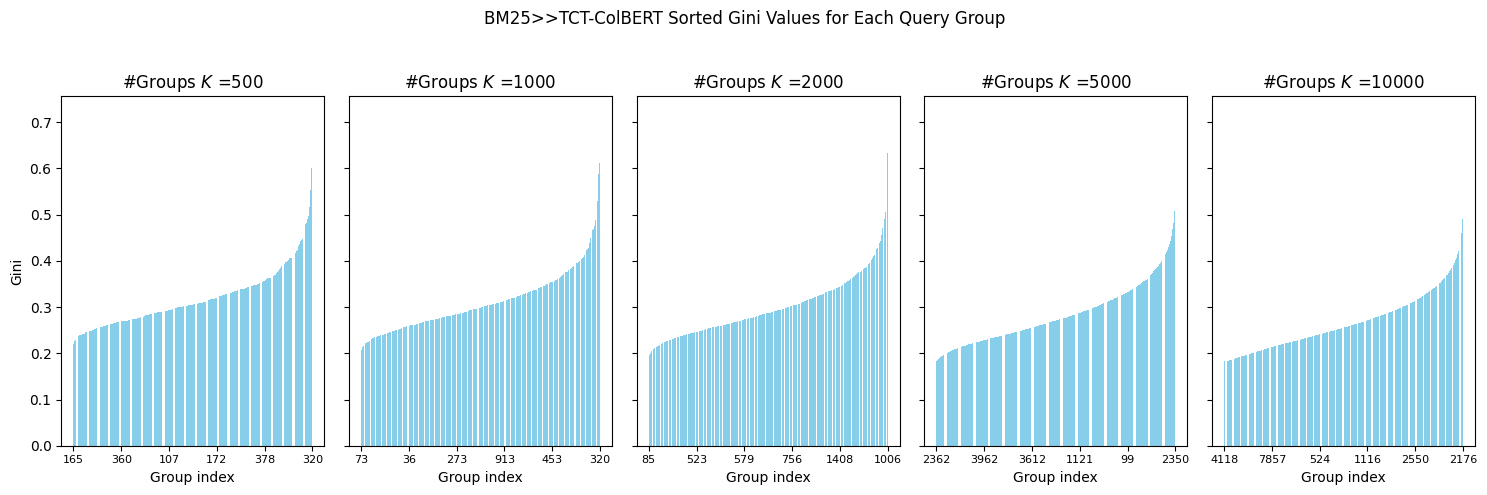

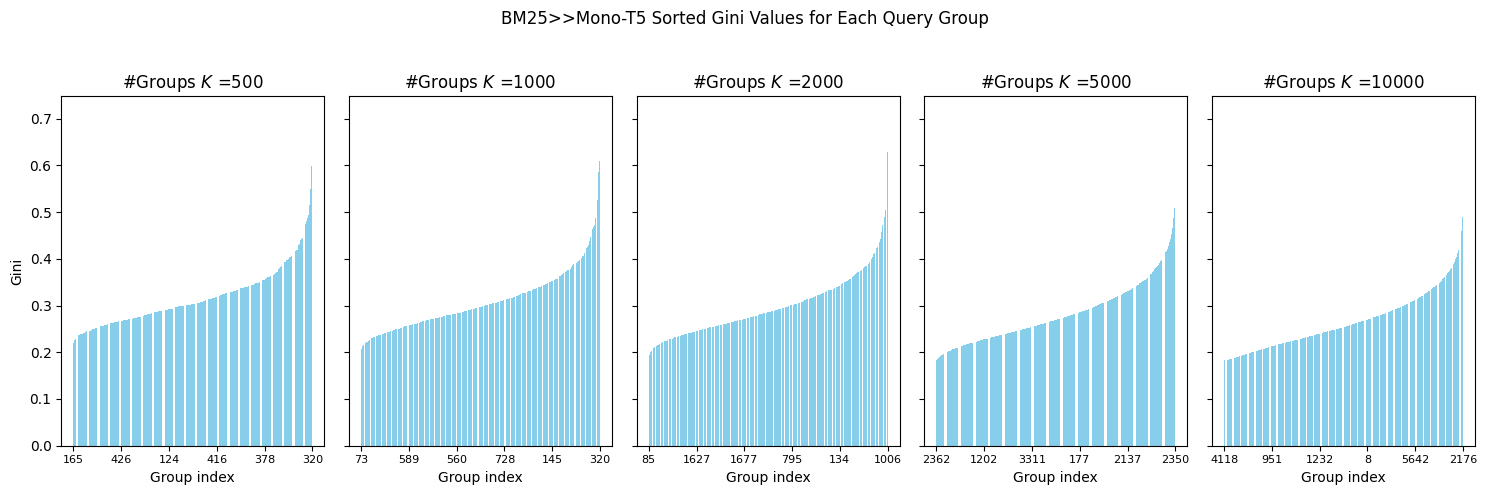

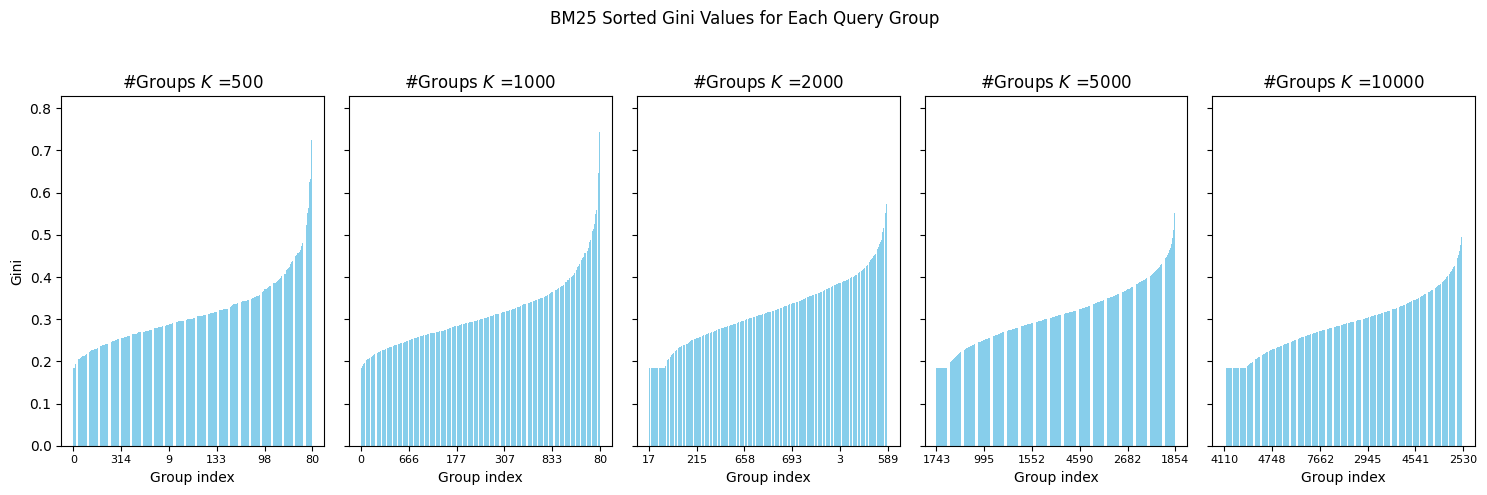

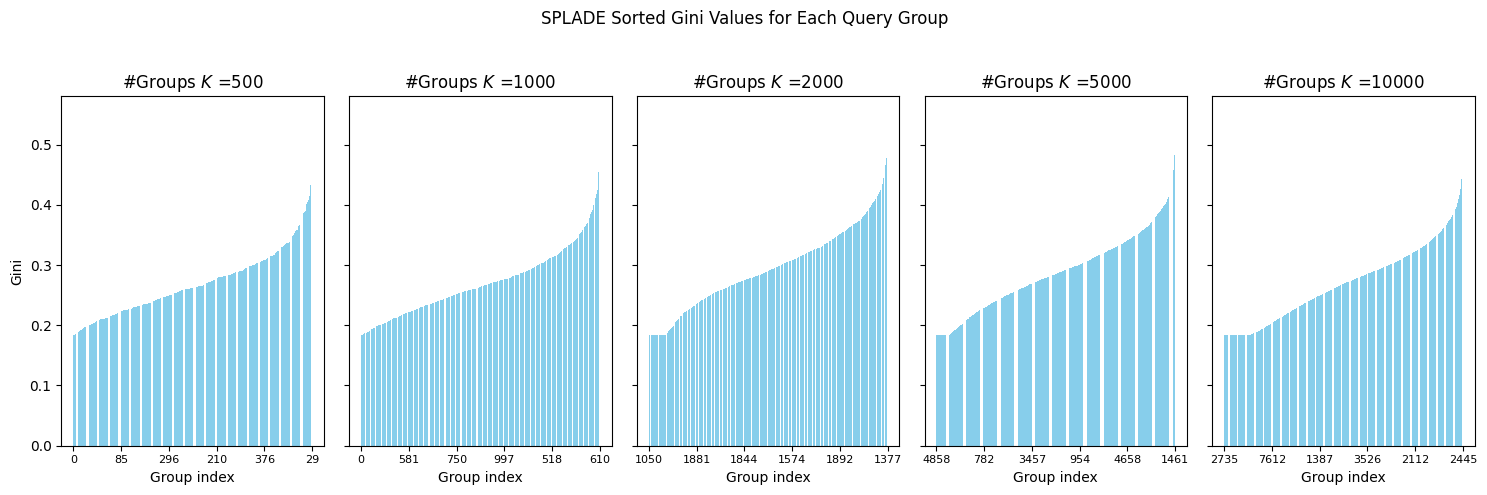

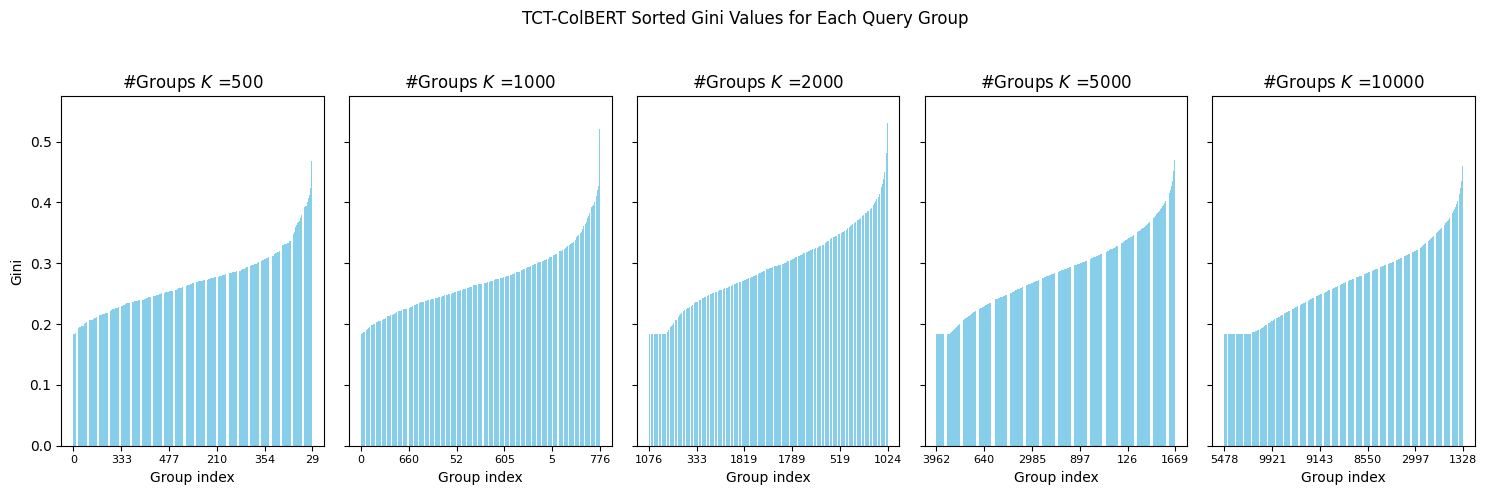

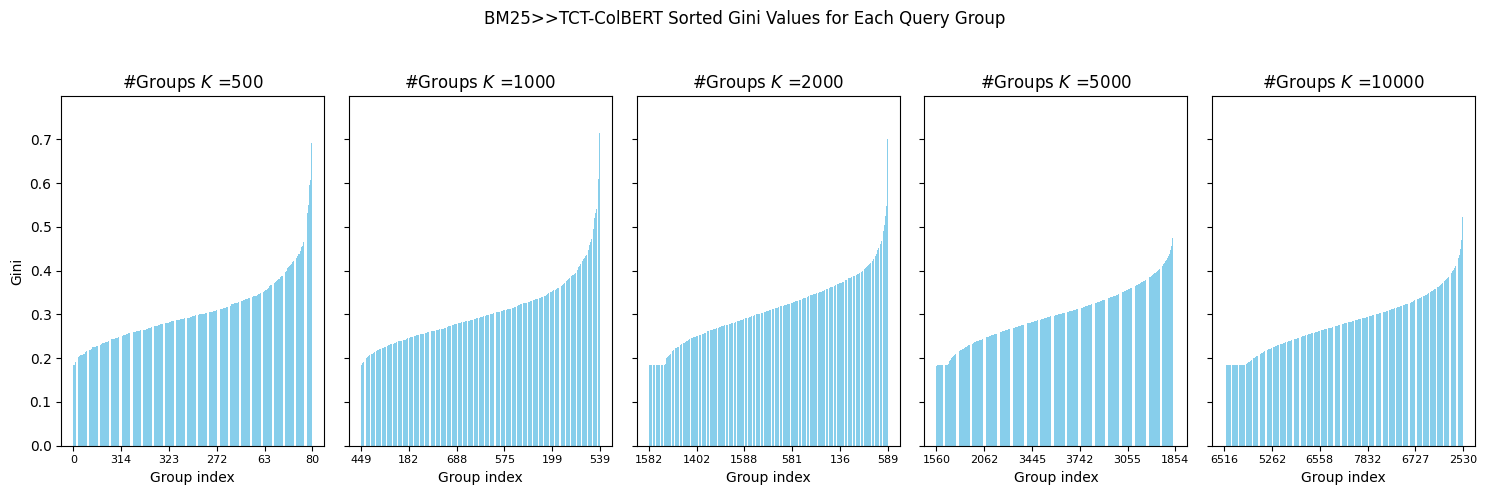

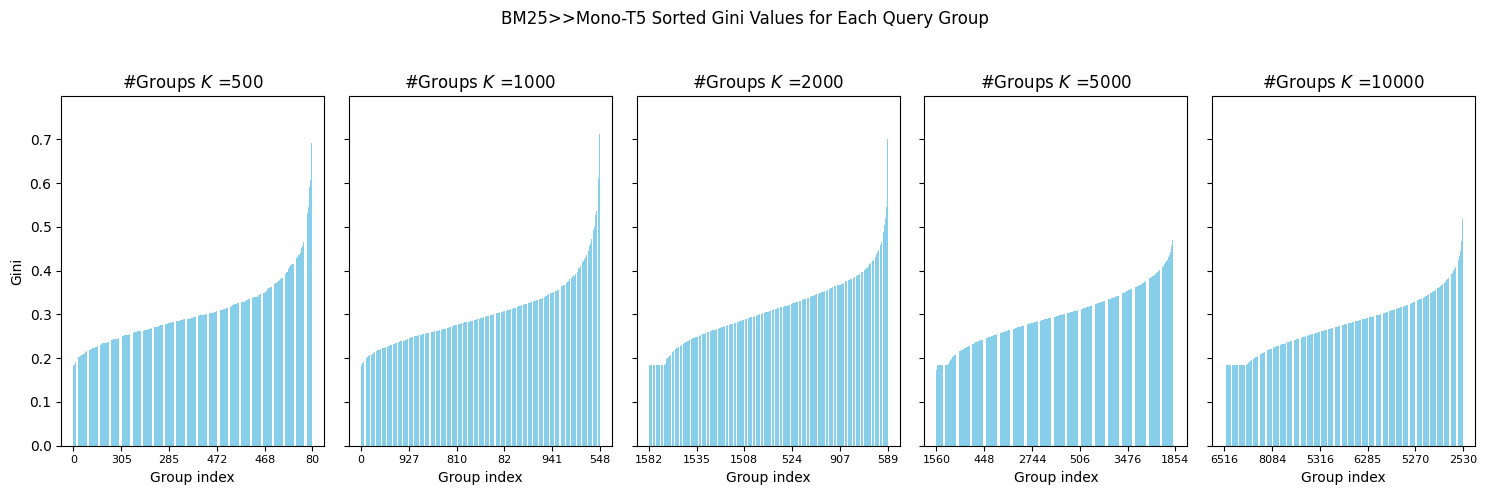

In [130]:
run_model = ['bm25', 'splade', 'tctcolbert', 'bm25_tctcolbert', 'bm25_monot5']
display_model = ['BM25', 'SPLADE', 'TCT-ColBERT', 'BM25>>TCT-ColBERT', 'BM25>>Mono-T5']
num_clusters = config.num_clusters
K_values = ['500', '1000', '2000', '5000', '10000']
kms = ['scikit_dense','scikit_tfidf']
for km in kms:
    for m_idx, modelname in enumerate(run_model):
        dfs = []
        for granu in num_clusters:
            csv = f'{data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_{granu}_{km}_each_group_gini.csv'
            df = pd.read_csv(csv, index_col=0).reset_index()
            dfs.append(df)
            
            # csv = f'{data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_{granu}_{km}_each_group_gini.csv'
            # df_1000 = pd.read_csv(csv, index_col=0).reset_index()
            
            # csv = f'{data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_{granu}_{km}_each_group_gini.csv'
            # df_2000 = pd.read_csv(csv, index_col=0).reset_index()
            
            # csv = f'{data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_{granu}_{km}_each_group_gini.csv'
            # df_5000 = pd.read_csv(csv, index_col=0).reset_index()
        
            # csv = f'{data_dir}/{modelname}_{config.dataset_name}_{config.topics_name}_{config.retrieve_num}_{granu}_{km}_each_group_gini.csv'
            # df_10000 = pd.read_csv(csv, index_col=0).reset_index()
        
        fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
        # dfs = [df_500, df_1000, df_2000, df_5000, df_10000]

        for idx, df in enumerate(dfs):
            df['group_id'] = df['group_id'].astype(str)
            sorted_df = df.sort_values(by='group_gini', ascending=True)
            axes[idx].bar(sorted_df['group_id'], sorted_df['group_gini'], color='skyblue')
            axes[idx].set_title(f'#Groups $K$ ={K_values[idx]}')
            axes[idx].set_xlabel('Group index')
        
            len = sorted_df.shape[0]
            ticks = [i for i in range(0, len+1, len//5)]
            labels = [sorted_df[i:i+1]['group_id'].values[0] if i != len else sorted_df[i-1:i]['group_id'].values[0] for i in ticks]
            axes[idx].set_xticks(ticks=ticks, labels=labels, fontsize=8)
            axes[idx].set_ylabel('Gini' if idx == 0 else '')
        
        plt.suptitle(f'{display_model[m_idx]} Sorted Gini Values for Each Query Group')
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig(f'{config.prog_dir}/each_group_gini_{modelname}_{km}.pdf', format="pdf", bbox_inches="tight", pad_inches=0)
        plt.show()